# Cat vs dog detector with Keras

Data located here https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2


In [3]:
DATADIR = "kagglecatsanddogs_3367a/PetImages"
CATEGORIES = ['Dog','Cat']

## Import Images in Grayscale

0.jpg


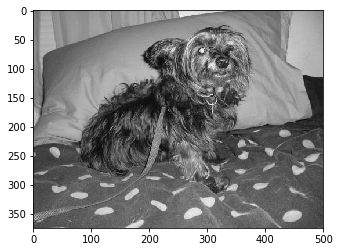

In [4]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        print(img)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break
        

In [5]:
print(img_array)

[[117 117 119 ..., 133 132 132]
 [118 117 119 ..., 135 134 134]
 [119 118 120 ..., 137 136 136]
 ..., 
 [ 79  74  73 ...,  80  76  73]
 [ 78  72  69 ...,  72  73  74]
 [ 74  71  70 ...,  75  73  71]]


In [6]:
print(img_array.shape)

(375, 500)


In [7]:
#in full colour
print(cv2.imread(os.path.join(path,"5557.jpg")))

[[[33 34 44]
  [33 34 44]
  [32 33 43]
  ..., 
  [90 84 89]
  [90 84 89]
  [90 84 89]]

 [[33 34 44]
  [32 33 43]
  [32 33 43]
  ..., 
  [90 84 89]
  [90 84 89]
  [90 84 89]]

 [[33 34 44]
  [32 33 43]
  [32 33 43]
  ..., 
  [91 85 90]
  [91 85 90]
  [91 85 90]]

 ..., 
 [[15 23 23]
  [15 23 23]
  [17 25 25]
  ..., 
  [82 83 74]
  [82 83 74]
  [82 83 74]]

 [[14 24 24]
  [18 28 28]
  [24 32 32]
  ..., 
  [82 83 74]
  [82 83 74]
  [83 84 75]]

 [[24 34 34]
  [28 38 38]
  [31 41 41]
  ..., 
  [83 81 73]
  [85 83 75]
  [86 84 76]]]


In [8]:
print(cv2.imread(os.path.join(path,"5557.jpg")).shape)

(342, 500, 3)


## Make all images same size

In [9]:
IMG_SIZE = 50


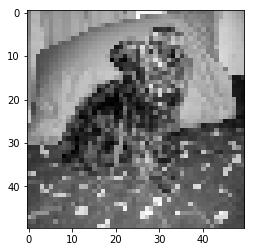

In [10]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [11]:
# We can convert dog and cat to 0 and 1 
CATEGORIES


['Dog', 'Cat']

In [12]:
CATEGORIES.index('Cat')

1

In [13]:
CATEGORIES.index('Dog')

0

In [14]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try: # some images are broken
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                #print(img)
                #plt.imshow(img_array, cmap='gray')
                #plt.show()
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
        

In [15]:
create_training_data()

In [16]:
print(len(training_data))

24946


## How balanced is our data?

Do we need to use class weights or can we balance the data

In [17]:
type(training_data)

list

In [18]:
training_data


[[array([[115, 160, 159, ..., 157, 148, 139],
         [121, 164, 166, ..., 163, 153, 146],
         [124, 161, 164, ..., 168, 161, 151],
         ..., 
         [155, 128,  88, ...,  81,  69,  68],
         [ 87,  95,  72, ...,  77,  74,  73],
         [ 75,  78,  79, ...,  75,  78,  75]], dtype=uint8), 0],
 [array([[116, 125,  75, ...,  88,  81,  61],
         [ 83, 126,  82, ...,  93,  69,  58],
         [106, 117,  99, ...,  27,  88,  68],
         ..., 
         [245, 243, 249, ..., 231, 224, 216],
         [249, 246, 249, ..., 238, 227, 227],
         [240, 239, 243, ..., 243, 234, 234]], dtype=uint8), 0],
 [array([[112, 102, 116, ..., 123, 122, 123],
         [ 88, 110, 120, ..., 123, 121, 119],
         [138, 140, 126, ..., 124, 124, 125],
         ..., 
         [203, 208, 206, ...,  98,  96,  94],
         [201, 199, 197, ...,  92,  95,  96],
         [201, 199, 198, ...,  93,  96,  95]], dtype=uint8), 0],
 [array([[188, 184, 181, ...,  35,  32,  38],
         [181, 184, 183,

In [19]:
training_data[0][0]

array([[115, 160, 159, ..., 157, 148, 139],
       [121, 164, 166, ..., 163, 153, 146],
       [124, 161, 164, ..., 168, 161, 151],
       ..., 
       [155, 128,  88, ...,  81,  69,  68],
       [ 87,  95,  72, ...,  77,  74,  73],
       [ 75,  78,  79, ...,  75,  78,  75]], dtype=uint8)

In [20]:
training_data[0][1]

0

In [21]:
n= len(training_data)

In [22]:
mysum=0
for i in range(n):
    #print(i)
    #print(training_data[i][1])
    mysum = mysum+ training_data[i][1]
mysum

12476

In [23]:
mysum/n


0.500120259761084

In [24]:
print(len(training_data))

24946


## We need to shuffle our data - It's currently all dogs followed by all cats

In [25]:
import random
random.shuffle(training_data)

In [26]:
training_data

[[array([[194, 218, 150, ...,  18,  48,  57],
         [102, 117, 108, ...,  16,  18,  11],
         [ 95,  88, 125, ...,  31,  10,  30],
         ..., 
         [137, 123, 123, ..., 144, 156, 133],
         [118, 138, 122, ..., 139, 135, 133],
         [147, 139, 128, ..., 121, 153, 132]], dtype=uint8), 0],
 [array([[172, 177, 168, ..., 143, 134, 130],
         [141, 176, 170, ..., 146, 134, 134],
         [164, 177, 173, ..., 147, 135, 136],
         ..., 
         [154, 131, 157, ..., 167, 166, 164],
         [156, 154, 151, ..., 169, 164, 162],
         [121, 151, 153, ..., 144, 165, 165]], dtype=uint8), 0],
 [array([[128, 130, 131, ..., 132, 132, 133],
         [130, 134, 134, ..., 132, 137, 133],
         [126, 130, 132, ..., 133, 137, 134],
         ..., 
         [ 93, 105, 131, ...,  92, 101, 108],
         [ 83, 100, 125, ...,  91,  96, 103],
         [104,  96, 115, ...,  93,  95,  98]], dtype=uint8), 1],
 [array([[ 93, 195, 195, ..., 200, 203, 161],
         [ 92, 192, 189,

In [27]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
0
1
0
1
0
1


In [28]:
X = []
y = []

In [29]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [30]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # 1 because gray scale


In [31]:
import pickle

pickle_out = open('X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()

## (For Reloading)

In [32]:
pickle_in = open('X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('y.pickle','rb')
y = pickle.load(pickle_in)

In [33]:
X


array([[[[194],
         [218],
         [150],
         ..., 
         [ 18],
         [ 48],
         [ 57]],

        [[102],
         [117],
         [108],
         ..., 
         [ 16],
         [ 18],
         [ 11]],

        [[ 95],
         [ 88],
         [125],
         ..., 
         [ 31],
         [ 10],
         [ 30]],

        ..., 
        [[137],
         [123],
         [123],
         ..., 
         [144],
         [156],
         [133]],

        [[118],
         [138],
         [122],
         ..., 
         [139],
         [135],
         [133]],

        [[147],
         [139],
         [128],
         ..., 
         [121],
         [153],
         [132]]],


       [[[172],
         [177],
         [168],
         ..., 
         [143],
         [134],
         [130]],

        [[141],
         [176],
         [170],
         ..., 
         [146],
         [134],
         [134]],

        [[164],
         [177],
         [173],
         ..., 
         [147],
 